In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

In [17]:
cumulative_vaccinations = [
    1959151,
    2080280,
    2254556,
    2494371,
    2769164,
    3090058,
    3365492,
    3520056,
    3687206,
    3985579,
    4303730,
    4661293,
    5085771,
    5727693,
    5962544,
    6221850,
    6473752,
    6816945,
    7253305,
    7792996,
    8082355,
    ]

daily_inoculations = [100000]

for i, x in enumerate(cumulative_vaccinations):
    if len(cumulative_vaccinations) > i+1:
        daily_inoculations.append(cumulative_vaccinations[i+1] - x)

dataframe = pd.DataFrame({'date': pd.date_range(start='1/12/2021', end='2/1/2021'), 'daily': daily_inoculations, 'cumulative': cumulative_vaccinations})
dataframe.set_index('date', inplace=True)

In [18]:
from datetime import datetime, timedelta

reg = LinearRegression()

x = np.array([x.timetuple().tm_yday for x in dataframe.index]).reshape(-1, 1)
y = dataframe['daily']

reg.fit(x, y)

LinearRegression()

In [19]:
import math
start = 11 + len(dataframe)
prediction_range = range(start, start + 35)
prediction_range_array = np.array(prediction_range).reshape(-1, 1)
projection = reg.predict(prediction_range_array)
projection = [x - (math.log(x) * 600 * i) for i, x in enumerate(projection, start=1)]
print(projection)

[431505.06474178075, 438680.40985475027, 445817.4008648121, 452917.8389357791, 459983.37902150897, 467015.54608145135, 474015.7490590414, 480985.2929876835, 487925.38952104433, 494837.166130544, 501721.67417002714, 508579.89597318135, 515412.7511214936, 522221.10199798585, 529005.7587235658, 535767.483557719, 542506.9948328196, 549224.9704810098, 555922.0512040098, 562598.8433290393, 569255.9213880044, 575893.8304520226, 582513.088249065, 589114.187088849, 595697.5956160036, 602263.7604098805, 608813.1074471064, 615346.0434410125, 621862.9570703923, 628364.2201085773, 634850.1884625545, 641321.2031307488, 647777.5910871314, 654219.6660984822, 660647.7294808915]


In [20]:

prediction_dates = [(datetime(2021, 1, 1) + timedelta(x)) for x in prediction_range]
result_df = pd.DataFrame({'date': prediction_dates, 'daily': projection})
result_df.set_index('date', inplace=True)

In [21]:
last_known = dataframe['cumulative'][-1]
# print(last_known)
projection_cumulative = []
for x in projection:
    projection_cumulative.append(last_known + x)
    last_known = last_known + x
result_df['cumulative'] = projection_cumulative
print(result_df)

                    daily    cumulative
date                                   
2021-02-01  431505.064742  8.224501e+06
2021-02-02  438680.409855  8.663181e+06
2021-02-03  445817.400865  9.108999e+06
2021-02-04  452917.838936  9.561917e+06
2021-02-05  459983.379022  1.002190e+07
2021-02-06  467015.546081  1.048892e+07
2021-02-07  474015.749059  1.096293e+07
2021-02-08  480985.292988  1.144392e+07
2021-02-09  487925.389521  1.193184e+07
2021-02-10  494837.166131  1.242668e+07
2021-02-11  501721.674170  1.292840e+07
2021-02-12  508579.895973  1.343698e+07
2021-02-13  515412.751121  1.395239e+07
2021-02-14  522221.101998  1.447461e+07
2021-02-15  529005.758724  1.500362e+07
2021-02-16  535767.483558  1.553939e+07
2021-02-17  542506.994833  1.608189e+07
2021-02-18  549224.970481  1.663112e+07
2021-02-19  555922.051204  1.718704e+07
2021-02-20  562598.843329  1.774964e+07
2021-02-21  569255.921388  1.831890e+07
2021-02-22  575893.830452  1.889479e+07
2021-02-23  582513.088249  1.947730e+07


In [25]:
complete = pd.concat([dataframe, result_df])
print(complete)


                    daily    cumulative
date                                   
2021-01-12  100000.000000  1.959151e+06
2021-01-13  121129.000000  2.080280e+06
2021-01-14  174276.000000  2.254556e+06
2021-01-15  239815.000000  2.494371e+06
2021-01-16  274793.000000  2.769164e+06
2021-01-17  320894.000000  3.090058e+06
2021-01-18  275434.000000  3.365492e+06
2021-01-19  154564.000000  3.520056e+06
2021-01-20  167150.000000  3.687206e+06
2021-01-21  298373.000000  3.985579e+06
2021-01-22  318151.000000  4.303730e+06
2021-01-23  357563.000000  4.661293e+06
2021-01-24  424478.000000  5.085771e+06
2021-01-25  641922.000000  5.727693e+06
2021-01-26  234851.000000  5.962544e+06
2021-01-27  259306.000000  6.221850e+06
2021-01-28  251902.000000  6.473752e+06
2021-01-29  343193.000000  6.816945e+06
2021-01-30  436360.000000  7.253305e+06
2021-01-31  539691.000000  7.792996e+06
2021-02-01  431505.064742  8.224501e+06
2021-02-02  438680.409855  8.663181e+06
2021-02-03  445817.400865  9.108999e+06


<Figure size 432x288 with 0 Axes>

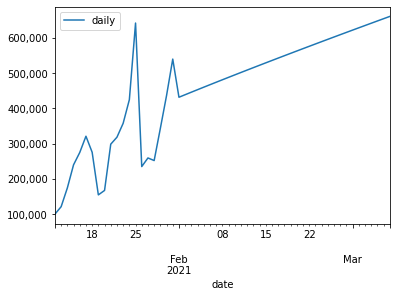

<Figure size 432x288 with 0 Axes>

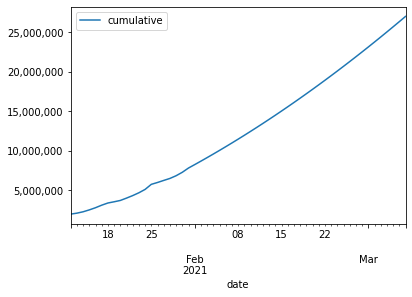

In [26]:
fig = plt.figure()
ax = complete.drop('cumulative', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

fig = plt.figure()
ax = complete.drop('daily', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

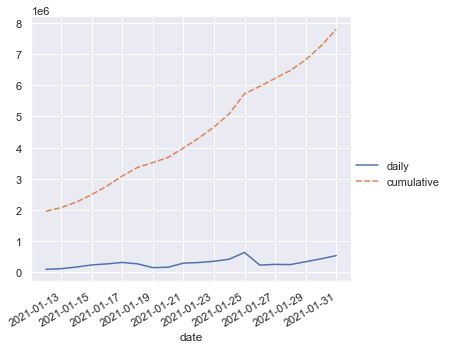

In [27]:
import seaborn as sns
sns.set_theme(style="darkgrid")
g = sns.relplot(kind="line", data=dataframe)
g.fig.autofmt_xdate()
